<a href="https://colab.research.google.com/github/aquibjaved/Deep-learning-for-text-classification/blob/master/simple_DNN/Simple_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 9.6MB/s 


In [0]:
# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '19vFHpNAuEUZIbOYrlXDRWJPOoXLMv3bX'
downloaded = drive.CreateFile({'id': file_id})

download = drive.CreateFile({'id': file_id})
download.GetContentFile('DOWNLOAD.tar')

# print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
!unzip DOWNLOAD.tar

Archive:  DOWNLOAD.tar
replace Deep_learning_for_text_classification/embeddings/glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Deep_learning_for_text_classification/embeddings/glove.6B.50d.txt  


replace __MACOSX/Deep_learning_for_text_classification/embeddings/._glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace __MACOSX/Deep_learning_for_text_classification/embeddings/._glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace __MACOSX/Deep_learning_for_text_classification/embeddings/._glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/Deep_learning_for_text_classification/embeddings/._glove.6B.50d.txt  
replace Deep_learning_for_text_classification/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Deep_learning_for_text_classification/.DS_Store  
replace __MACOSX/Deep_learning_for_text_classification/._.DS_Store? [y]es, [n]o, [A

In [0]:
import os
from gensim import models
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
embeddings_index = {}
f = open('../content/Deep_learning_for_text_classification/embeddings/glove.6B.50d.txt')
for line in f:

    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embeddings_index["why"]

array([ 0.32386  ,  0.011154 ,  0.23443  , -0.18039  ,  0.6233   ,
       -0.059467 , -0.62369  ,  0.12782  , -0.40932  ,  0.083849 ,
       -0.19215  ,  0.57834  , -0.49637  , -0.048521 ,  1.099    ,
        0.6298   ,  0.26122  , -0.11049  ,  0.16728  , -0.71227  ,
       -0.371    ,  0.51635  ,  0.54567  ,  0.27623  ,  0.82096  ,
       -2.1861   , -1.0027   ,  0.11441  ,  0.53145  , -0.86653  ,
        2.5888   ,  0.37458  , -0.51935  , -0.68734  , -0.14537  ,
       -0.53177  , -0.065899 ,  0.0077695,  0.31162  , -0.17694  ,
       -0.36669  ,  0.17919  ,  0.21591  ,  0.61326  ,  0.41495  ,
        0.17295  , -0.19359  ,  0.26349  , -0.19398  ,  0.58678  ],
      dtype=float32)

In [0]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import gensim

In [0]:
model_file = "../content/Deep_learning_for_text_classification/embeddings/glove.6B.50d.txt"
_ = glove2word2vec(glove_input_file=model_file, word2vec_output_file="../content/gensim_glove_vectors.txt")


from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("../content/gensim_glove_vectors.txt", binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
glove_model.most_similar("red")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('yellow', 0.8995459079742432),
 ('blue', 0.8901658654212952),
 ('green', 0.8561931848526001),
 ('black', 0.8400583863258362),
 ('purple', 0.8323201537132263),
 ('white', 0.8149363398551941),
 ('pink', 0.81486576795578),
 ('orange', 0.8042871952056885),
 ('golden', 0.7416437864303589),
 ('colored', 0.7381109595298767)]

In [0]:
from numpy import zeros
import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [0]:
# Reading data
train_df = pd.read_csv('../content/Deep_learning_for_text_classification/Data/imdb_master.csv', encoding = "ISO-8859-1")

In [0]:
train_df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [0]:
train_df = train_df.drop(["Unnamed: 0","file", "type"], axis=1)

In [0]:
train_df.label.value_counts()

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64

In [0]:
train_df = train_df[train_df.label != 'unsup']
train_df["label"] = train_df["label"].map({"pos":1,"neg":0})

In [0]:
train_df.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [0]:
# Cleaning and Pre Processing text
import re

def clean_numbers(text):
    text = re.sub('[0-9]{5,}', '#####', text)
    text = re.sub('[0-9]{4}', '####', text)
    text = re.sub('[0-9]{3}', '###', text)
    text = re.sub('[0-9]{2}', '##', text)
    return text

def clean_text(text):
    text = clean_numbers(text)
    text = str(text)

    for punct in "/-'":
        text = text.replace(punct, ' ')
    for punct in '&':
        text = text.replace(punct, f' {punct} ')
    for punct in '?!.,"$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’':
        text = text.replace(punct, '')

    text = text.lower()
    return text


In [0]:
# Clean text in dataFrame
train_df["processed_data"] = train_df["review"].progress_apply(lambda x: clean_text(x))
train_df["length"] = train_df["processed_data"].progress_apply(lambda x: len(x.split()))

100%|██████████| 50000/50000 [00:00<00:00, 76458.42it/s]


In [0]:
train_df.head(5)

,review,label,processed_data,length
0,Once again Mr. Costner has dragged out a movie...,0,once again mr costner has dragged out a movie ...,171
1,This is an example of why the majority of acti...,0,this is an example of why the majority of acti...,244
2,"First of all I hate those moronic rappers, who...",0,first of all i hate those moronic rappers who ...,232
3,Not even the Beatles could write songs everyon...,0,not even the beatles could write songs everyon...,321
4,Brass pictures (movies is not a fitting word f...,0,brass pictures movies is not a fitting word fo...,241


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c3fb43fd0>]],
      dtype=object)

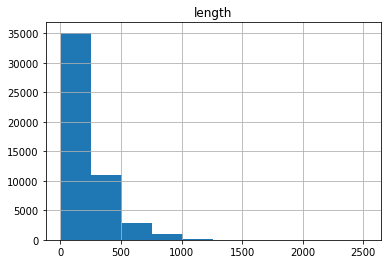

In [0]:
# The average length of sentences
train_df["length"].mean()
# Check the histogram 
train_df.hist("length")

In [0]:

docs = train_df["processed_data"].values
labels = train_df["label"].values

In [0]:
# Import gc, clearing some memory in ram
import gc
del train_df
gc.collect()

0

In [0]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

In [0]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)

In [0]:
print(docs[0])
print(encoded_docs[0])

once again mr costner has dragged out a movie for far longer than necessary aside from the terrific sea rescue sequences of which there are very few i just did not care about any of the characters most of us have ghosts in the closet and costner s character are realized early on and then forgotten until much later by which time i did not care the character we should really care about is a very cocky overconfident ashton kutcher the problem is he comes off as kid who thinks he s better than anyone else around him and shows no signs of a cluttered closet his only obstacle appears to be winning over costner finally when we are well past the half way point of this stinker costner tells us all about kutcher s ghosts we are told why kutcher is driven to be the best with no prior inkling or foreshadowing no magic here it was all i could do to keep from turning it off an hour in
[283, 176, 451, 7110, 47, 3382, 45, 3, 18, 16, 223, 1142, 73, 1724, 1171, 38, 1, 1311, 1617, 2142, 851, 4, 63, 40, 2

In [0]:
# pad documents to a max length of max words
max_length = 150
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')


In [0]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
# Create Train/Test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_docs, labels, test_size=0.2, random_state=42)

In [0]:
# DNN with embeddings

vocab_size = vocab_size

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=max_length, trainable=True))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu) )
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()

W0725 13:00:56.062639 140310017009536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 13:00:56.089936 140310017009536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 13:00:56.094195 140310017009536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 13:00:56.105782 140310017009536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0725 13:00:56.106813 1403100170

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 50)           7018250   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3264      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 7,022,571
Trainable params: 7,022,571
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

W0725 13:01:08.977191 140310017009536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 13:01:09.003780 140310017009536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
reduce_err = EarlyStopping(monitor='val_loss', 
                           min_delta=0,patience=0,
                           verbose=0, mode='auto')


In [0]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=15, batch_size=512, callbacks=[reduce_err])

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 2s 54us/step - loss: 0.6529 - acc: 0.6406 - val_loss: 0.5864 - val_acc: 0.7085
Epoch 2/15
40000/40000 [==============================] - 1s 19us/step - loss: 0.4979 - acc: 0.7708 - val_loss: 0.4249 - val_acc: 0.8144
Epoch 3/15
40000/40000 [==============================] - 1s 19us/step - loss: 0.3606 - acc: 0.8475 - val_loss: 0.3527 - val_acc: 0.8487
Epoch 4/15
40000/40000 [==============================] - 1s 18us/step - loss: 0.2868 - acc: 0.8825 - val_loss: 0.3224 - val_acc: 0.8653
Epoch 5/15
40000/40000 [==============================] - 1s 18us/step - loss: 0.2375 - acc: 0.9044 - val_loss: 0.3052 - val_acc: 0.8736
Epoch 6/15
40000/40000 [==============================] - 1s 18us/step - loss: 0.2004 - acc: 0.9223 - val_loss: 0.2995 - val_acc: 0.8797
Epoch 7/15
40000/40000 [==============================] - 1s 18us/step - loss: 0.1674 - acc: 0.9374 - val_loss: 0.3020 - val_acc

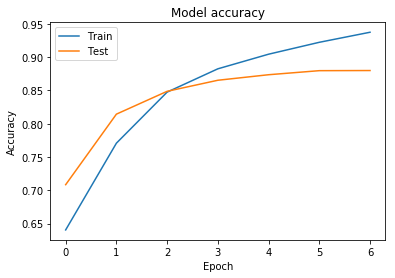

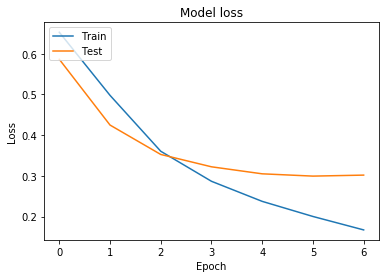

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()